# Clustering 
#automating hand writtien to digital digit conversion.


In [2]:

from time import time                # Keeps track of elaspsed time

import numpy as np
from scipy import ndimage
from matplotlib import pyplot as plt

from sklearn import manifold, datasets

0


<Figure size 640x480 with 0 Axes>

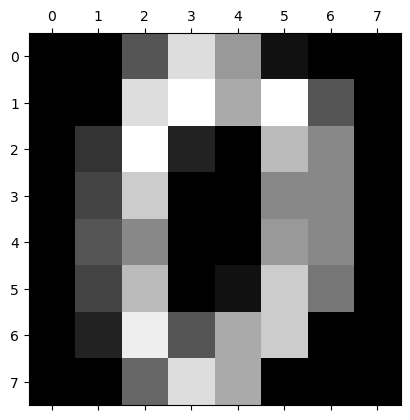

In [10]:
#Loads the digits and looks at a few examples

digits = datasets.load_digits(n_class=10)
print(digits.target[0])

# Print the digits
plt.gray() 
plt.matshow(digits.images[0]) 
plt.show() 

In [9]:
# Splits the digits and the targets 
from scipy import stats

X = digits.data
y = digits.target
print(stats.describe(y))             # check structure


n_samples, n_features = X.shape
stats.describe(y)

np.random.seed(50)

DescribeResult(nobs=1797, minmax=(0, 9), mean=4.490818030050083, variance=8.209965755844001, skewness=0.006393465443566757, kurtosis=-1.2147296065623656)


In [10]:
# This cell doupbles the number of images and adds a little bit of random noise to each new image
from scipy import stats

def nudge_images(X, y):
    shift = lambda x: ndimage.shift(x.reshape((8, 8)),
                                  .3 * np.random.normal(size=2),
                                  mode='constant',
                                  ).ravel()
    X = np.concatenate([X, np.apply_along_axis(shift, 1, X)])
    Y = np.concatenate([y, y], axis=0)
    return X, Y


X, y = nudge_images(X, y)            # Doulble the size of the data set
#X, y = nudge_images(X, y)            # Double it again. (May need to comment this out if computation time too long)
stats.describe(y)                    # check structure

DescribeResult(nobs=3594, minmax=(0, 9), mean=4.490818030050083, variance=8.207680766766394, skewness=0.006393465443566753, kurtosis=-1.2147296065623656)

In [11]:
# 2D embedding of the digits dataset
print("Computing embedding")
X_reduced = manifold.SpectralEmbedding(n_components=2).fit_transform(X)
print("Done.")
print(X[0])
print(X_reduced[0])

Computing embedding
Done.
[ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
 15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
  0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
  0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]
[0.00180381 0.0006707 ]


In [11]:
## Example Graphing Code to get better visualization of the clusters for reduced data set ONLY
def plot_clustering(X_red, labels, title=None):
    x_min, x_max = np.min(X_red, axis=0), np.max(X_red, axis=0)
    X_red = (X_red - x_min) / (x_max - x_min)

    plt.figure(figsize=(12, 8))
    for i in range(X_red.shape[0]):
        plt.text(X_red[i, 0], X_red[i, 1], str(y[i]),
                 color=plt.cm.nipy_spectral(labels[i] / 10.),
                 fontdict={'weight': 'bold', 'size': 12})

    plt.xticks([])
    plt.yticks([])
    if title is not None:
        plt.title(title, size=17)
    plt.axis('off')
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])

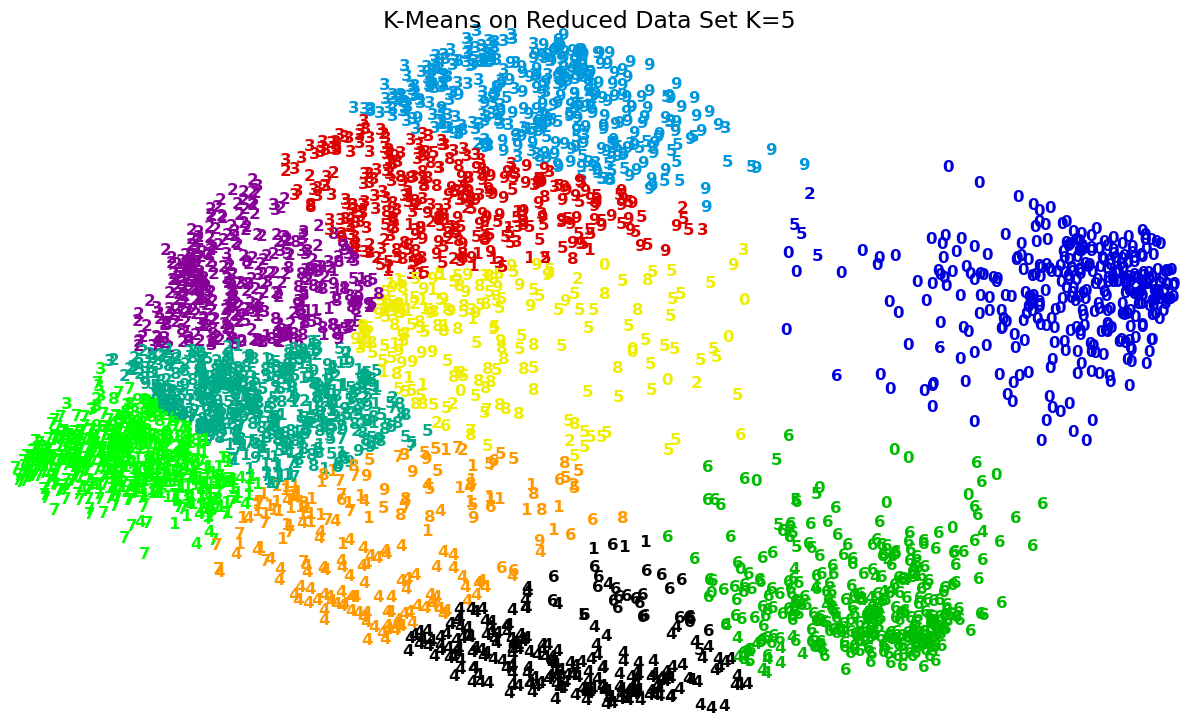

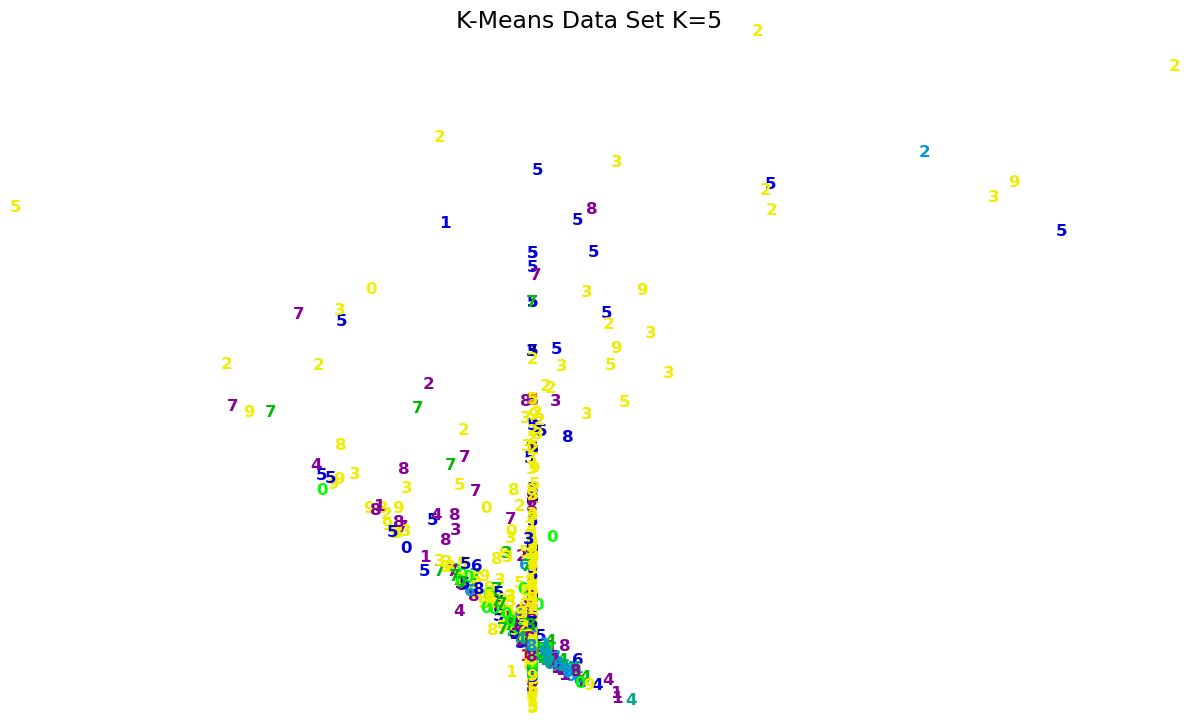

In [13]:
#### In this cell implement kmeans clustering 
##   1) Run the clustering algorithm on the full data set
##   2) Run the clustering algorithm on the reduced data set
##   3) Print a scatter in 2d space for each
from sklearn.cluster import KMeans
# import KMeans
from sklearn.cluster import KMeans

# create kmeans object
kmeans = KMeans(n_clusters=10)
# fit kmeans object to data
kmeans.fit(X_reduced)
# print location of clusters learned by kmeans object
#print(kmeans.cluster_centers_)
# save new clusters for chart
y_km = kmeans.fit_predict(X_reduced)
# Run for the reduced data set



# This code will print a scatter plot with the target labels instead of dots. You can use it after you run your clustering 
# algorithm to visualize the results. 

plot_clustering(X_reduced, kmeans.labels_, "K-Means on Reduced Data Set K=5")
plt.show()

kmeans = KMeans(n_clusters=10)
# fit kmeans object to data
kmeans.fit(X)
# print location of clusters learned by kmeans object
#print(kmeans.cluster_centers_)
# save new clusters for chart
y_km = kmeans.fit_predict(X)
# Run for the reduced data set

plot_clustering(X, kmeans.labels_, "K-Means Data Set K=5")
plt.show()



In [14]:
from scipy.spatial.distance import cdist   # to calculate distance and evaluate cluster fit

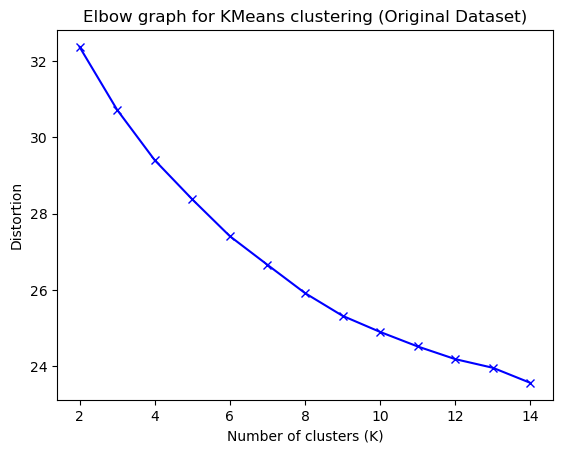

Optimal K value for Original Dataset: 14


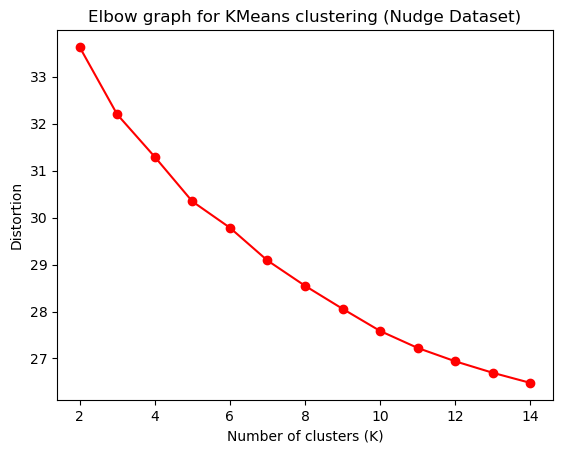

Optimal K value for Nudge Dataset: 14


In [30]:
digits = datasets.load_digits(n_class=10)
nudge_images = lambda X, y: (np.concatenate([X, np.apply_along_axis(lambda x: ndimage.shift(x.reshape((8, 8)), .3 * np.random.normal(size=2), mode='constant').ravel(), 1, X)]), np.concatenate([y, y], axis=0))
X_orig, y_orig = digits.data, digits.target
X_nudge, y_nudge = nudge_images(X_orig, y_orig)

k_values = range(2, 15)
for X, y, title in ((X_orig, y_orig, 'Original Dataset'), (X_nudge, y_nudge, 'Nudge Dataset')):
    distortions = [sum(np.min(cdist(X, KMeans(n_clusters=k).fit(X).cluster_centers_, 'euclidean'), axis=1)) / X.shape[0] for k in k_values]
    silhouettes = [silhouette_score(X, KMeans(n_clusters=k).fit(X).labels_) for k in k_values]
    optimal_k = np.argmin(distortions) + 2
    plt.plot(k_values, distortions, 'bx-' if title == 'Original Dataset' else 'ro-')
    plt.xlabel('Number of clusters (K)')
    plt.ylabel('Distortion')
    plt.title(f'Elbow graph for KMeans clustering ({title})')
    plt.show()
    print(f"Optimal K value for {title}: {optimal_k}")
